**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Importing the necessary libraries to understand the data and 
# build a predictive model using multiple linear regression technique

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# to display all the columns
pd.set_option('display.max_columns', 100) 

# to display all the rows
pd.set_option('display.max_rows', 100)

In [2]:
# reading the csv data file

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of data
print('The dataset has',df.shape[0],'rows and',df.shape[1],'columns in it')

The dataset has 730 rows and 16 columns in it


In [4]:
# checking the summary of numerical variables in dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#checking the list of variables with their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# check for null values in any variables

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Note**: No null values found in any of the variables

**Drop the variables not necessary for analysis**

In [7]:
# let's take cnt as target variable for analysis and hence casual & registered can be dropped as they sum up to cnt

df.drop(["casual","registered"],axis=1,inplace=True)

# instant variable specifies a row number of dataset, which is not required for analysis and can be droppped

df.drop("instant",axis=1,inplace=True)

# dteday is separated as yr, month, weekday and hence can be dropped

df.drop("dteday",axis=1,inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Converting numerical columns into categorical variables for better interpretation of data

In [8]:
# firstly labelling the numerical data of season variable

df["season"].replace({1: "Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)

# next, labelling the numerical data of month variable

df["mnth"].replace({1: "Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

# next, labelling the numerical data of weekday variable

df["weekday"].replace({1: "Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat",0:"Sun"},inplace=True)

# finally labelling the numerical data of weathersit

df["weathersit"].replace({1: "Clear",2:"Cloudy",3:"Light Snow + Rain",4:"Heavy Snow + Rain"},inplace=True)

df[["season","mnth","weekday","weathersit"]].head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Mon,Cloudy
1,Spring,Jan,Tue,Cloudy
2,Spring,Jan,Wed,Clear
3,Spring,Jan,Thu,Clear
4,Spring,Jan,Fri,Clear


In [9]:
# let year, working day and holiday variables be the same as they are binary variables and doesn't require dummies creation

df[["yr","holiday","workingday"]].head()

,yr,holiday,workingday
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


<Figure size 1440x1080 with 0 Axes>

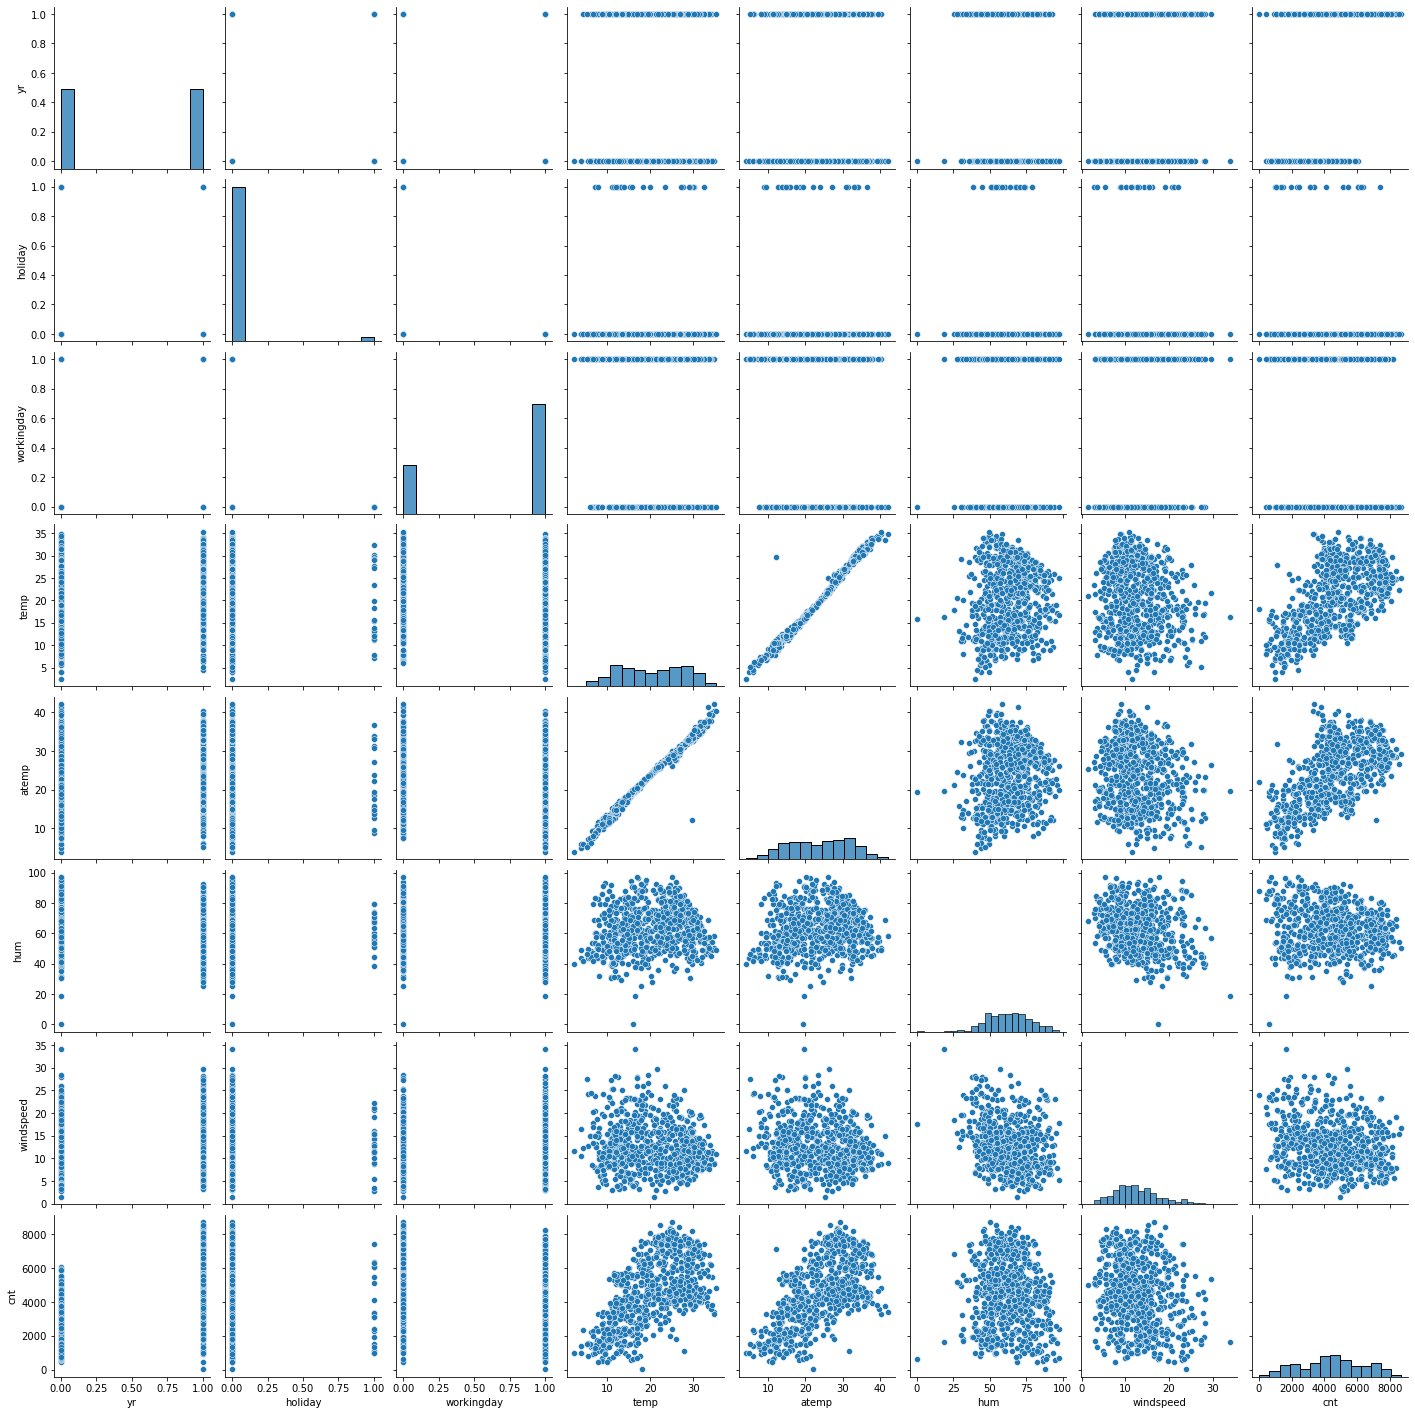

In [10]:
plt.figure(figsize=[20,15])
sns.pairplot(df);

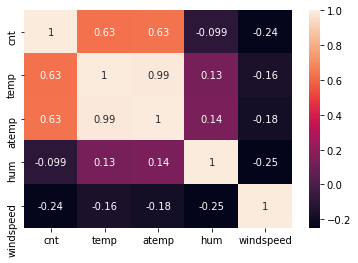

In [11]:
# seems like, temp and atemp, the numeric variables specially are highly correlated
# let us plot heatmap to check correlation between them

sns.heatmap(df[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(),annot=True);

In [12]:
## as noticed above, temp and atemp are having high correlation of 0.99 close to 1 and hence one of them can be dropped

df.drop("atemp",axis=1,inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


**EDA**

In [13]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


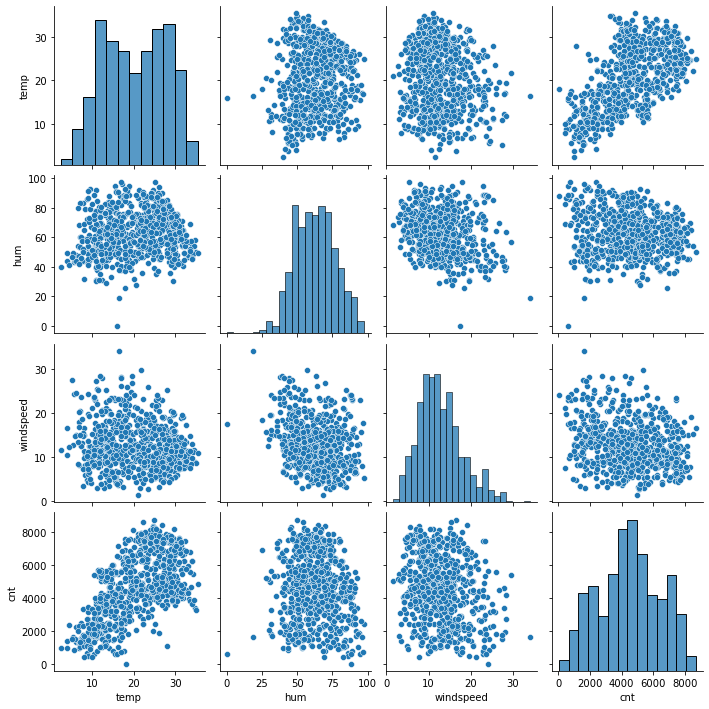

In [14]:
#visualizing the continuous numerical data variables to know the distribution of data

sns.pairplot(df[['temp','hum','windspeed','cnt']]);

with above pair plots its clear that numerical data is normally distributed, for better understanding, let us study individually

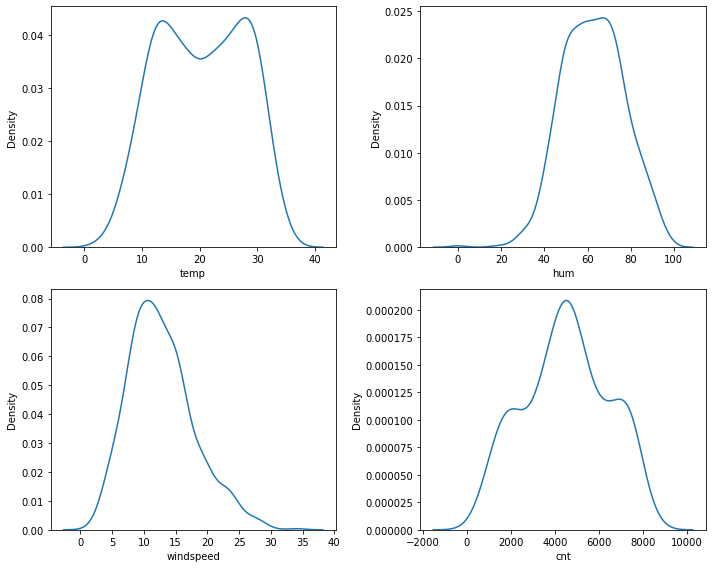

In [15]:
num_variables = ['temp','hum','windspeed','cnt']
plt.figure(figsize=(10,8))
for i in enumerate(num_variables):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]], hist=False)
    plt.tight_layout();

**Inferences**

- Temperature : Range is quite normal. The data of nearly 70% distributed between 10 to 30 degrees.
- Humidity : Yet again normal. Its merely centered but peak can be observed at 60 to 70 units.
- Windspeed : Mean range between 7 to 12, quite unusual because summer, winter doesn't have so much wind compared to spring.

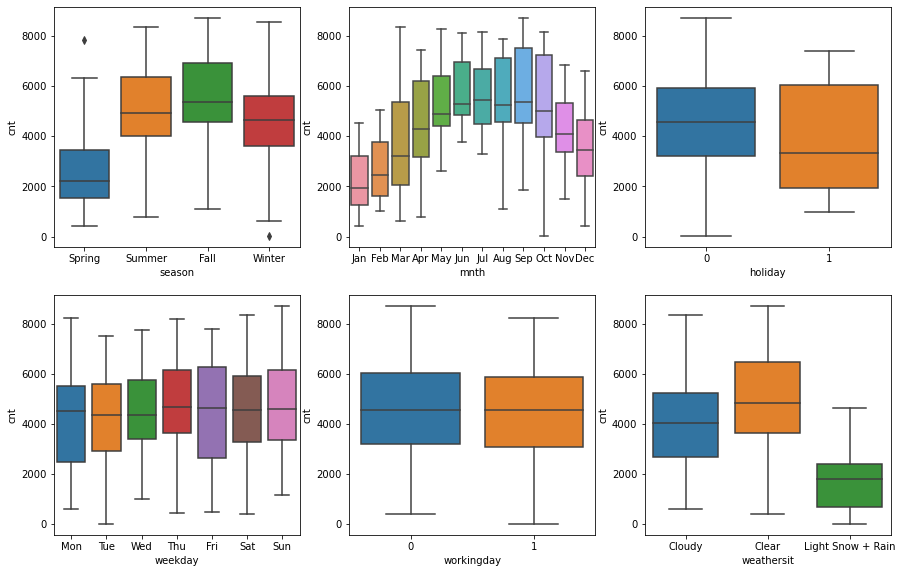

In [16]:
cat_variables = ['season','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_variables):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
    plt.tight_layout;

**Inferences**

- **Season** : Bookings attracted more during Fall and less during spring, winter and summer have similar figure.
- **Month** : July has more business results whereas Jan has less count.
- **Holiday** : Count is reduced during holidays.
- **Weekday** : It actually looks average when median is observed, but count wise, friday holds higher rank.
- **Working day** : No much impact whether its a working day or non working day, bookings are attracted.
- **Weathersit** : Clear day attracted more whereas Light snow + rain attracted less business, quite expected.

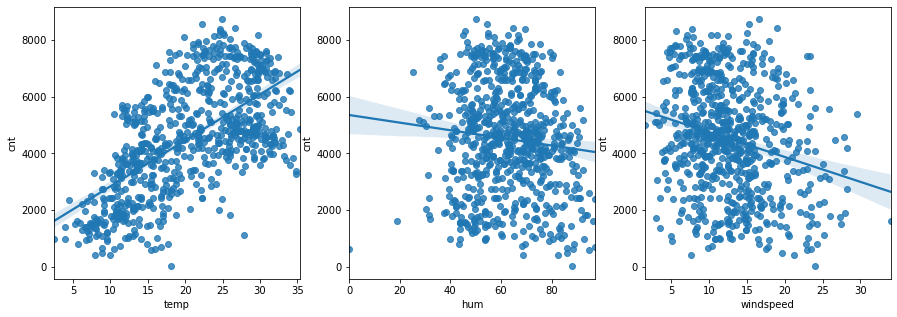

In [17]:
sca_vars = ["temp","hum","windspeed"]
plt.figure(figsize=(15,5))
for i in enumerate(sca_vars):
    plt.subplot(1,3,i[0]+1)
    sns.regplot(data=df, x=i[1], y='cnt')
    plt.tight_layout;

**Inferences**

- temp has linear positive co-relation with the count, which clearly shows that business increases with increase in count.
- hum and windspeed plots are more scattered and away from reg line, however inversely affecting the business.

**Data Preparation for Linear Regression**

In [18]:
# Create dummy variables for categorical variables i.e season, month, weekday, weathersit variables

df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [19]:
# check for successfull importing of dummies for categorical variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   hum                           730 non-null    float64
 5   windspeed                     730 non-null    float64
 6   cnt                           730 non-null    int64  
 7   season_Spring                 730 non-null    uint8  
 8   season_Summer                 730 non-null    uint8  
 9   season_Winter                 730 non-null    uint8  
 10  mnth_Aug                      730 non-null    uint8  
 11  mnth_Dec                      730 non-null    uint8  
 12  mnth_Feb                      730 non-null    uint8  
 13  mnth_

In [20]:
# check for numerical data being successfully loaded in terms of numerical variables

df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Cloudy,weathersit_Light Snow + Rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.634247,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.481971,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Model Building**

*Split Data into training and test*


In [21]:
# assign the target variable to y

y=df.pop("cnt")

# variable x would be all the other independent variables in the dateset

X=df

# split the train and test sets of data with the ratio 70:30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("The number of rows and columns in X_train set are: ", X_train.shape)
print("The number of rows and columns in X_test set are: ", X_test.shape)

The number of rows and columns in X_train set are:  (511, 29)
The number of rows and columns in X_test set are:  (219, 29)


In [22]:
# taking out cnt from numerical variables list as its taken as target for data preparation

num_variables = ['temp','hum','windspeed']

# Use Normalized scaler to scale

scaler = MinMaxScaler()

# Fit and transform training set only

X_train[num_variables] = scaler.fit_transform(X_train[num_variables])

# check out the statistical summary of the training data

X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Cloudy,weathersit_Light Snow + Rain
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.650333,0.320844,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.626223,0.344423,0.029354
std,0.500412,0.157613,0.453121,0.225640,0.145741,0.169639,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.484280,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.538858,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.653499,0.298098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754401,0.414438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**RFE and Automated approach to build model**

Use RFE to eliminate some columns

In [23]:
# introduce the sklearn's linear regression model for RFE

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [24]:
# implement the automated approach and bring down the variables to count of 15

rfe = RFE(lr,15)

rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [25]:
# Columns selected by RFE and their weights

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Clear', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Snow + Rain', True, 1)]

In [26]:
included_rfe_variables = X_train.columns[rfe.support_]
included_rfe_variables

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Clear', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain'],
      dtype='object')

#### Variables considered by RFE approach are as mentioned above

In [27]:
excluded_rfe_variables = X_train.columns[~rfe.support_]
excluded_rfe_variables

Index(['workingday', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### Variables excluded by RFE approach are as mentioned above

<AxesSubplot:>

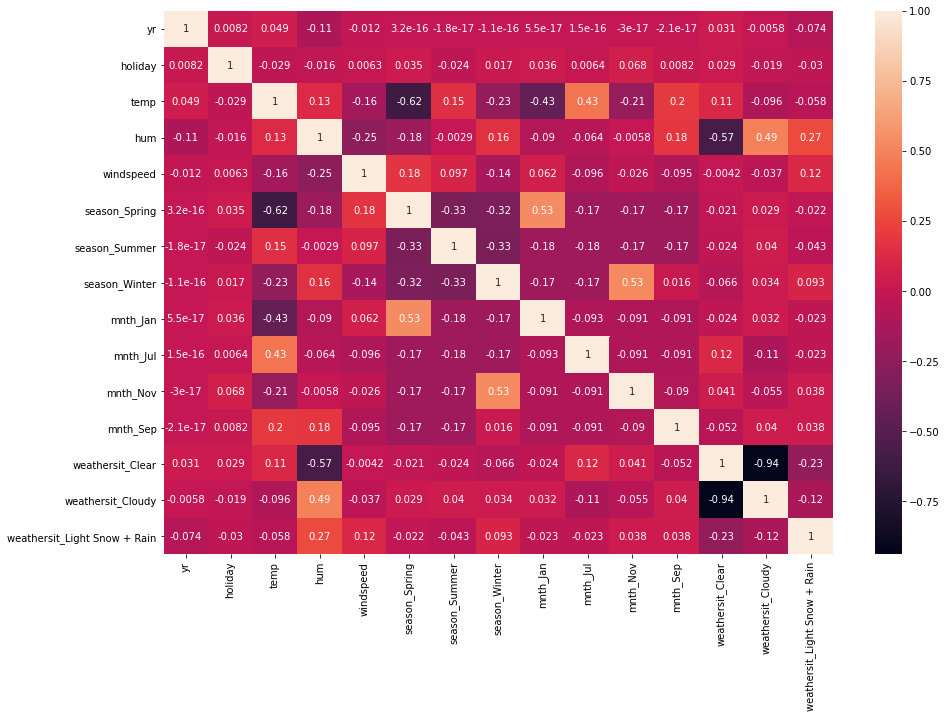

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df[included_rfe_variables].corr(),annot=True)

### Model Preparation

In [29]:
# let us now consider the variables selected by RFE approach and start building the mode
# focussing on manual elimination of the variables and maintaining the numbers on P-value, VIF and R-Squared

X_train_sm = sm.add_constant(X_train[included_rfe_variables])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.49e-189
Time:                        21:01:19   Log-Likelihood:                -4122.3
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Manual elimination method**

In [30]:
# dropping mnth_Jan as it has negative coff and has high p value

included_rfe_variables_model2 = included_rfe_variables.drop('mnth_Jan')

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model2])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model2]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          6.45e-190
Time:                        21:01:19   Log-Likelihood:                -4124.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     497   BIC:                             8336.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [31]:
# dropping holiday as it has negative coff and has high p value

included_rfe_variables_model3 = included_rfe_variables_model2.drop("holiday")

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model3])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model3]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          2.56e-188
Time:                        21:01:19   Log-Likelihood:                -4130.8
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     498   BIC:                             8343.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [32]:
# dropping hum as it has negative coff and has high p value

included_rfe_variables_model4 = included_rfe_variables_model3.drop("hum")

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model4])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model4]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.9
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          5.42e-185
Time:                        21:01:19   Log-Likelihood:                -4141.5
No. Observations:                 511   AIC:                             8307.
Df Residuals:                     499   BIC:                             8358.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [33]:
# dropping mnth_jul as it has negative coff and has high p value

included_rfe_variables_model5 = included_rfe_variables_model4.drop("mnth_Jul")

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model5])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model5]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.5
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.35e-184
Time:                        21:01:19   Log-Likelihood:                -4145.3
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     500   BIC:                             8359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [34]:
# dropping temp as it has negative coff and has high p value

included_rfe_variables_model6 = included_rfe_variables_model5.drop("temp")

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model6])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model6]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.68e-150
Time:                        21:01:19   Log-Likelihood:                -4228.6
No. Observations:                 511   AIC:                             8477.
Df Residuals:                     501   BIC:                             8519.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [35]:
# replacing jan with spring as both are highly correlated

included_rfe_variables_model7 = ['yr', 'windspeed', 'mnth_Jul', 'season_Summer', 'season_Winter',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Clear', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain']

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model7])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model7]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     86.05
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           8.55e-96
Time:                        21:01:19   Log-Likelihood:                -4357.8
No. Observations:                 511   AIC:                             8736.
Df Residuals:                     501   BIC:                             8778.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [36]:
# replacing weathersit_Clear with workingday to improvise based on better correlation variable

included_rfe_variables_model8 = ['yr', 'workingday', 'season_Spring', 'mnth_Jul',
       'season_Summer', 'season_Winter', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Light Snow + Rain', 'weathersit_Cloudy']

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model8])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model8]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     145.1
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          7.76e-141
Time:                        21:01:19   Log-Likelihood:                -4248.7
No. Observations:                 511   AIC:                             8519.
Df Residuals:                     500   BIC:                             8566.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [37]:
# getting back temp due to its high correlation and dropping season summer and working day

included_rfe_variables_model9 = ['yr', 'season_Spring', 'mnth_Jul',
       'temp', 'season_Winter', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Light Snow + Rain', 'weathersit_Cloudy']

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model9])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model9]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     249.4
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          9.45e-179
Time:                        21:01:20   Log-Likelihood:                -4162.0
No. Observations:                 511   AIC:                             8344.
Df Residuals:                     501   BIC:                             8386.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [38]:
# dropping weekday_Sat due to p value more than 0.05

included_rfe_variables_model10 = ['yr', 'season_Spring', 'mnth_Jul',
        'season_Winter', 'mnth_Sep','weathersit_Light Snow + Rain', 'weathersit_Cloudy', 'temp']

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model10])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

df1 = X_train[included_rfe_variables_model10]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [ variance_inflation_factor (df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF', ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.2
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.10e-179
Time:                        21:01:20   Log-Likelihood:                -4162.7
No. Observations:                 511   AIC:                             8343.
Df Residuals:                     502   BIC:                             8381.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**This seems to be pretty good values with stats factors where R squared is 0.818, p-values are all 0 and values of VIF of variables are less than 5**

In [39]:
print("The final variables with which we are proceeding to build the model are:",included_rfe_variables_model10)

The final variables with which we are proceeding to build the model are: ['yr', 'season_Spring', 'mnth_Jul', 'season_Winter', 'mnth_Sep', 'weathersit_Light Snow + Rain', 'weathersit_Cloudy', 'temp']


In [40]:
# Build a model with above independet variables
# find out intercept and coefficent

lr1 = LinearRegression()
lr = lr1.fit(X_train[included_rfe_variables_model10],y_train)
print(lr.intercept_,lr.coef_)

1693.4878139665107 [ 2034.85963308  -997.61724757  -593.32641179   451.11782838
   533.83935552 -2571.55959276  -667.7639847   4094.56807152]


In [41]:
#predict the model
y_train_pred = lr.predict(X_train[included_rfe_variables_model10])

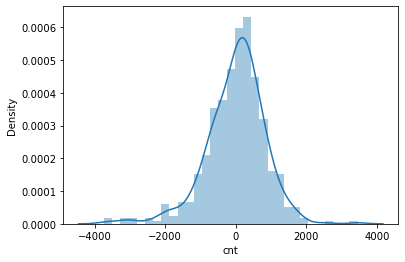

In [42]:
#residual distribution
sns.distplot(y_train - y_train_pred);

errors are normally distributed with mean close to zero. we are on the right track.

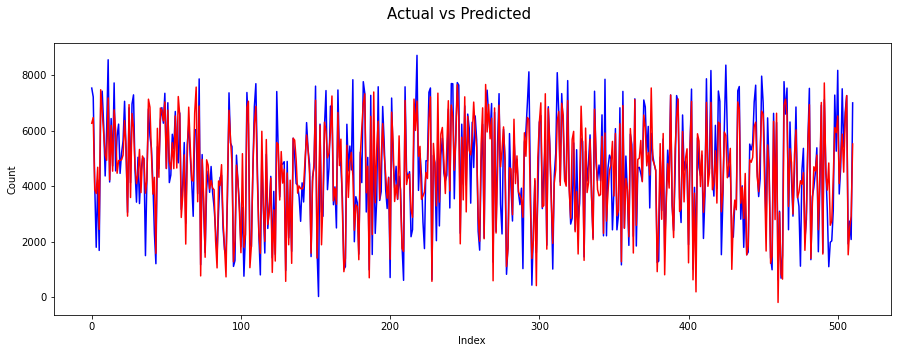

In [43]:
# Actual vs Predicted

ran = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(15,5))
plt.plot(ran,y_train, color="blue")
plt.plot(ran,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

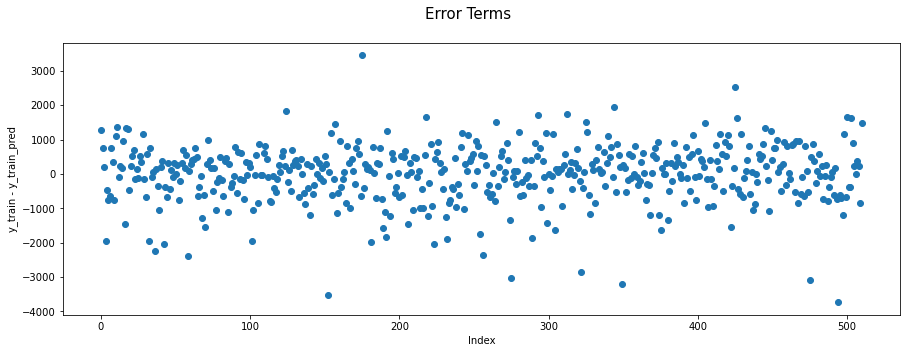

In [44]:
# Error Terms

ran_error = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(15,5))
plt.plot(ran_error,y_train-y_train_pred,linewidth=2.5,linestyle="",marker="o")
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train - y_train_pred')
plt.show()

In [45]:
#evaluate the R squared
r2_score(y_train,y_train_pred)

0.8170021636715851

### Prediction on test data

In [46]:
#Test data to be transformed only, no fitting

X_test[num_variables] = scaler.transform(X_test[num_variables])
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Cloudy,weathersit_Light Snow + Rain
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [47]:
# Predict

y_test_pred = lr.predict(X_test[included_rfe_variables_model10])

In [48]:
r2_score(y_test,y_test_pred)

0.8093513380351411

Difference of R squared between train and test data is within the admissible limit and hence model built holds good

**Error plot for test data**

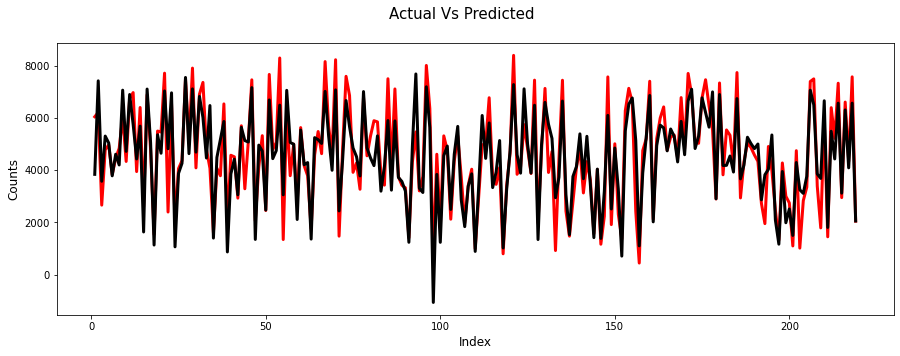

In [49]:
ran = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(15,5))
plt.plot(ran,y_test, color="red", linewidth=3)
plt.plot(ran,y_test_pred, color="black",  linewidth=3)
fig.suptitle('Actual Vs Predicted', fontsize=15)  
plt.xlabel('Index', fontsize=12)
plt.ylabel('Counts', fontsize=12);

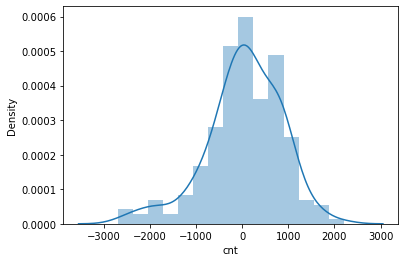

In [50]:
sns.distplot(y_test - y_test_pred);

**Mean of Errors are centered to Zero**

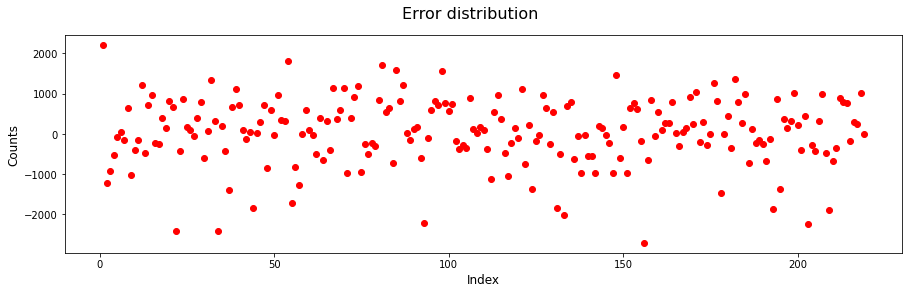

In [51]:
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(15,4))
plt.plot(c, y_test - y_test_pred, marker="o",linestyle="",color="red", linewidth=2)
fig.suptitle('Error distribution', fontsize=16)         
plt.xlabel('Index', fontsize=12)                     
plt.ylabel('Counts', fontsize=12);

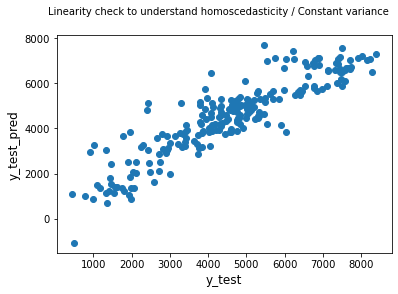

In [52]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Linearity check to understand homoscedasticity / Constant variance', fontsize = 10)   
plt.xlabel('y_test', fontsize = 12)                         
plt.ylabel('y_test_pred', fontsize = 12);

### Conclusion

In [53]:
included_rfe_variables_model10 = ['yr', 'season_Spring', 'mnth_Jul',
        'season_Winter', 'mnth_Sep','weathersit_Light Snow + Rain', 'weathersit_Cloudy', 'temp']

X_train_sm = sm.add_constant(X_train[included_rfe_variables_model10])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.2
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.10e-179
Time:                        21:01:23   Log-Likelihood:                -4162.7
No. Observations:                 511   AIC:                             8343.
Df Residuals:                     502   BIC:                             8381.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [54]:
for i in range(len(lm.params.keys())):
    print(lm.params.keys()[i],"------------------------",lm.params[i]/10000)

const ------------------------ 0.16934878139665147
yr ------------------------ 0.20348596330835333
season_Spring ------------------------ -0.09976172475717532
mnth_Jul ------------------------ -0.05933264117940613
season_Winter ------------------------ 0.045111782838097796
mnth_Sep ------------------------ 0.05338393555197361
weathersit_Light Snow + Rain ------------------------ -0.2571559592761639
weathersit_Cloudy ------------------------ -0.0667763984704779
temp ------------------------ 0.4094568071524133


Finally we have achieved a model which is fairly decent to conclude with below statistical numbers

- p values is 0 for all the model variables which represents significance of model
- VIF - less than 5 for all the model variables which is again significant enough to conclude the model
- The final model has less than 10 variables
- R squared difference between train 0.817 and test 0.809 is less than 5 %

**Business suggestions to increase the count of demand and generate revenue**

- Year : Its a positive sign that business has raised from previous year data (2018)
- Spring, Winter : Focus on winter sales and ensure necessary actions taken to prevent loss during summer
- Jul, Sep : Promoting more in these months can provide more bookings and increase in demand
- Temp : No doubt, temperature is predominant variable, good temperature, good bookings.
- Weather : Cloudy and rain hits the bookings, so its better to avoid promotions during these times.